In [1]:
# ========================
# 1. Download & Extract Dataset
# ========================
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 94% 1.00G/1.06G [00:10<00:02, 30.4MB/s]
100% 1.06G/1.06G [00:10<00:00, 111MB/s] 


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,515,137 (32.48 MB)

 Trainable params: 8,515,137 (32.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 147ms/step - accuracy: 0.5445 - loss: 0.6888 - val_accuracy: 0.7086 - val_loss: 0.5635
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - accuracy: 0.7007 - loss: 0.5755 - val_accuracy: 0.7406 - val_loss: 0.5068
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.7551 - loss: 0.5075 - val_accuracy: 0.7964 - val_loss: 0.4338
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.7935 - loss: 0.4411 - val_accuracy: 0.8238 - val_loss: 0.3924
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 128ms/step - accuracy: 0.8254 - loss: 0.3970 - val_accuracy: 0.8310 - val_loss: 0.3741
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.8465 - loss: 0.3500 - val_accuracy: 0.8430 - val_loss: 0.3681
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 123ms/step - accuracy: 0.8598 - loss: 0.3269 - val_accuracy: 0.8436 - val_loss: 0.3555
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 139ms/step - accuracy: 0.8783 - loss: 0

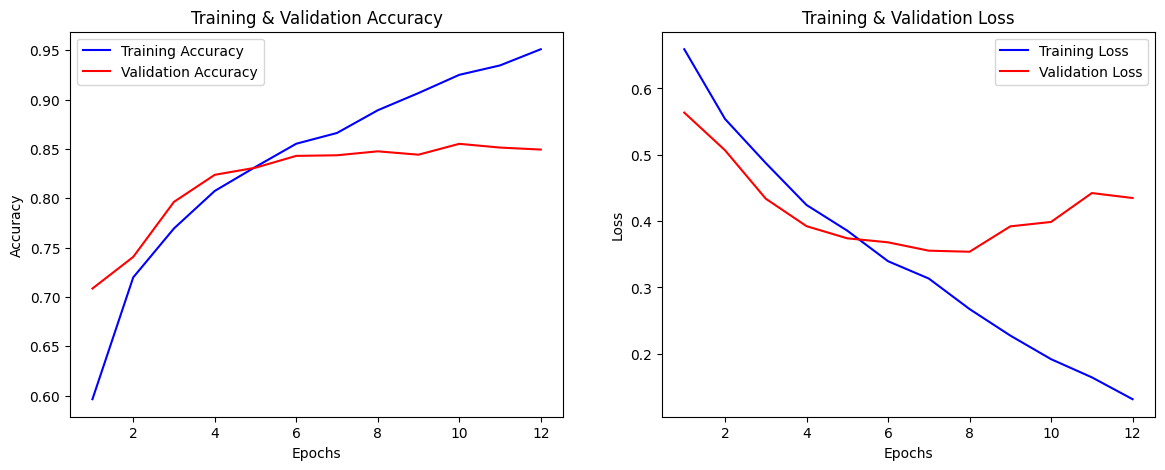

In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# ========================
# 2. Import Libraries
# ========================
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# ========================
# 3. Data Preprocessing
# ========================
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=128,  # Batch size adjust kar sakte ho 64 bhi
    image_size=(128,128),
    shuffle=True
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=128,
    image_size=(128,128),
    shuffle=True
)

# Normalize images
def process(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# ========================
# 4. Create CNN Model
# ========================
model = Sequential([
    Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(128,128,3)),
    MaxPool2D((2,2)),

    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPool2D((2,2)),

    Conv2D(128,(3,3),activation='relu',padding='same'),
    MaxPool2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.6),  # dropout slightly increased
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.summary()

# ========================
# 5. Compile Model
# ========================
optimizer = keras.optimizers.Adam(learning_rate=0.0005)  # reduced learning rate
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# ========================
# 6. Callbacks
# ========================
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,  # slightly increased patience
    restore_best_weights=True
)

# ========================
# 7. Train Model on Full Dataset
# ========================
history = model.fit(
    train_ds,
    epochs=15,
    validation_data=validation_ds,
    callbacks=[early_stop]
)

# ========================
# 8. Plot Training History
# ========================
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Raw prediction: 0.9311169
Prediction → dog 🐶 


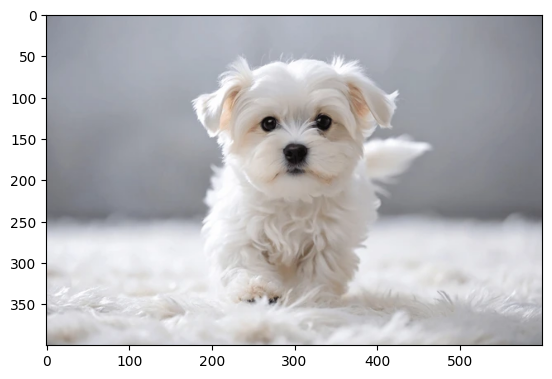

In [101]:
import cv2
import numpy as np

# 1. Read & convert to RGB
test_image = cv2.imread('/content/16.webp')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)

# 2. Resize
test_image = cv2.resize(test_image, (128,128))

# 3. Normalize
test_input = test_image.astype('float32') / 255.0
test_input = np.expand_dims(test_input, axis=0)

# 4. Predict
prediction = model.predict(test_input)
print("Raw prediction:", prediction[0][0])

# 5. Human readable
if prediction[0][0] < 0.5:
    print("Prediction → cat 🐱")
else:
    print("Prediction → dog 🐶 ")
